In [1]:
#import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import NMF
from gensim.models.nmf import Nmf
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erisha_ferrao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erisha_ferrao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erisha_ferrao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
input_file ='Client_data.json'

In [3]:
# load the dataset
dataset = pd.read_json(input_file)
dataset.head()

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0,"{'tags': None, 'zip_code': '10473', 'complaint..."


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   _index   78313 non-null  object
 1   _type    78313 non-null  object
 2   _id      78313 non-null  int64 
 3   _score   78313 non-null  int64 
 4   _source  78313 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.0+ MB


In [5]:
source_df= pd.DataFrame(dict(dataset['_source'])).transpose()
source_df.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [6]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78313 entries, 0 to 78312
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tags                       10900 non-null  object
 1   zip_code                   71556 non-null  object
 2   complaint_id               78313 non-null  object
 3   issue                      78313 non-null  object
 4   date_received              78313 non-null  object
 5   state                      76322 non-null  object
 6   consumer_disputed          78313 non-null  object
 7   product                    78313 non-null  object
 8   company_response           78313 non-null  object
 9   company                    78313 non-null  object
 10  submitted_via              78313 non-null  object
 11  date_sent_to_company       78313 non-null  object
 12  company_public_response    4 non-null      object
 13  sub_product                67742 non-null  object
 14  timely

In [7]:
#Taking relevant columns
topic_df=source_df[['issue','product','sub_product','complaint_what_happened','sub_issue']].copy()
topic_df

,issue,product,sub_product,complaint_what_happened,sub_issue
0,Attempts to collect debt not owed,Debt collection,Credit card debt,,Debt is not yours
1,Written notification about debt,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt
2,"Other features, terms, or problems",Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card
3,Trouble during payment process,Mortgage,Conventional home mortgage,,None
4,Fees or interest,Credit card or prepaid card,General-purpose credit card or charge card,,Charged too much interest
...,...,...,...,...,...
78308,Closing an account,Checking or savings account,Checking account,,Funds not received from closed account
78309,"Other features, terms, or problems",Credit card or prepaid card,General-purpose credit card or charge card,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem
78310,Problem with a lender or other company chargin...,Checking or savings account,Checking account,I am not familiar with XXXX pay and did not un...,Transaction was not authorized
78311,"Other features, terms, or problems",Credit card or prepaid card,General-purpose credit card or charge card,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer


In [8]:
topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78313 entries, 0 to 78312
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   issue                    78313 non-null  object
 1   product                  78313 non-null  object
 2   sub_product              67742 non-null  object
 3   complaint_what_happened  78313 non-null  object
 4   sub_issue                32016 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


In [9]:
#making a copy for EDA
topic_d=topic_df.copy()

In [10]:
#Fetch wordcount for each abstract
topic_d['word_count_complaint'] = topic_d['complaint_what_happened'].apply(lambda x: len(str(x).split(" ")))
topic_d[['complaint_what_happened','word_count_complaint']].head()

,complaint_what_happened,word_count_complaint
0,,1
1,Good morning my name is XXXX XXXX and I apprec...,92
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,65
3,,1
4,,1


In [11]:
print(topic_d['word_count_complaint'].eq(1).sum())

57246


A lot of columns dont have data
- merge with other columns to extract useful info

In [14]:
topic_d['combined data'] = topic_d[['issue', 'product','complaint_what_happened']].apply(lambda x: '. '.join(x), axis = 1)
topic_d.head()

,issue,product,sub_product,complaint_what_happened,sub_issue,word_count_complaint,combined data
0,Attempts to collect debt not owed,Debt collection,Credit card debt,,Debt is not yours,1,Attempts to collect debt not owed. Debt collec...
1,Written notification about debt,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,92,Written notification about debt. Debt collecti...
2,"Other features, terms, or problems",Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,65,"Other features, terms, or problems. Credit car..."
3,Trouble during payment process,Mortgage,Conventional home mortgage,,None,1,Trouble during payment process. Mortgage.
4,Fees or interest,Credit card or prepaid card,General-purpose credit card or charge card,,Charged too much interest,1,Fees or interest. Credit card or prepaid card.


In [15]:
topic_d['combined data'][0]

'Attempts to collect debt not owed. Debt collection. '

In [16]:
topic_d=topic_d.drop(['issue','product','complaint_what_happened'], axis=1)
topic_d

,sub_product,sub_issue,word_count_complaint,combined data
0,Credit card debt,Debt is not yours,1,Attempts to collect debt not owed. Debt collec...
1,Credit card debt,Didn't receive enough information to verify debt,92,Written notification about debt. Debt collecti...
2,General-purpose credit card or charge card,Problem with rewards from credit card,65,"Other features, terms, or problems. Credit car..."
3,Conventional home mortgage,None,1,Trouble during payment process. Mortgage.
4,General-purpose credit card or charge card,Charged too much interest,1,Fees or interest. Credit card or prepaid card.
...,...,...,...,...
78308,Checking account,Funds not received from closed account,1,Closing an account. Checking or savings account.
78309,General-purpose credit card or charge card,Other problem,385,"Other features, terms, or problems. Credit car..."
78310,Checking account,Transaction was not authorized,412,Problem with a lender or other company chargin...
78311,General-purpose credit card or charge card,Problem with balance transfer,412,"Other features, terms, or problems. Credit car..."


In [17]:
topic_d['sub_product'] = topic_d['sub_product'].apply(lambda x: str(x or ' '))
topic_d['sub_issue'] = topic_d['sub_issue'].apply(lambda x: str(x or ' '))
topic_d=topic_d.drop(['word_count_complaint'], axis=1)
topic_d['word_count_combined'] = topic_d['combined data'].apply(lambda x: len(str(x).split(" ")))
topic_d

,sub_product,sub_issue,combined data,word_count_combined
0,Credit card debt,Debt is not yours,Attempts to collect debt not owed. Debt collec...,9
1,Credit card debt,Didn't receive enough information to verify debt,Written notification about debt. Debt collecti...,98
2,General-purpose credit card or charge card,Problem with rewards from credit card,"Other features, terms, or problems. Credit car...",75
3,Conventional home mortgage,,Trouble during payment process. Mortgage.,6
4,General-purpose credit card or charge card,Charged too much interest,Fees or interest. Credit card or prepaid card.,9
...,...,...,...,...
78308,Checking account,Funds not received from closed account,Closing an account. Checking or savings account.,8
78309,General-purpose credit card or charge card,Other problem,"Other features, terms, or problems. Credit car...",395
78310,Checking account,Transaction was not authorized,Problem with a lender or other company chargin...,426
78311,General-purpose credit card or charge card,Problem with balance transfer,"Other features, terms, or problems. Credit car...",422


In [18]:
topic_d=topic_d.drop(['sub_product','sub_issue','word_count_combined'], axis=1)

In [19]:
#preprocessing
topic_d['combined data'] = topic_d['combined data'].str.lower()
topic_d['combined data'] = topic_d['combined data'].str.replace(r'[^a-z]', ' ')  
topic_d['combined data'] = topic_d['combined data'].str.replace(r'\s+', ' ')
topic_d

C:\Users\erisha_ferrao\AppData\Local\Temp\ipykernel_6904\2693169726.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  topic_d['combined data'] = topic_d['combined data'].str.replace(r'[^a-z]', ' ')
C:\Users\erisha_ferrao\AppData\Local\Temp\ipykernel_6904\2693169726.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  topic_d['combined data'] = topic_d['combined data'].str.replace(r'\s+', ' ')


,combined data
0,attempts to collect debt not owed debt collect...
1,written notification about debt debt collectio...
2,other features terms or problems credit card o...
3,trouble during payment process mortgage
4,fees or interest credit card or prepaid card
...,...
78308,closing an account checking or savings account
78309,other features terms or problems credit card o...
78310,problem with a lender or other company chargin...
78311,other features terms or problems credit card o...


In [20]:
#Removing stop words

stop = stopwords.words('english')
topic_d['combined data'] = topic_d['combined data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
topic_d

,combined data
0,attempts collect debt owed debt collection
1,written notification debt debt collection good...
2,features terms problems credit card prepaid ca...
3,trouble payment process mortgage
4,fees interest credit card prepaid card
...,...
78308,closing account checking savings account
78309,features terms problems credit card prepaid ca...
78310,problem lender company charging account checki...
78311,features terms problems credit card prepaid ca...


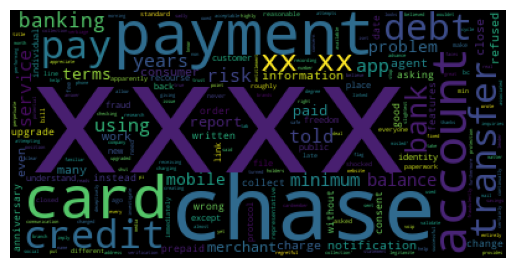

In [21]:
#wordcloud to get most frequent words 

from wordcloud import WordCloud

text = topic_d['combined data'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

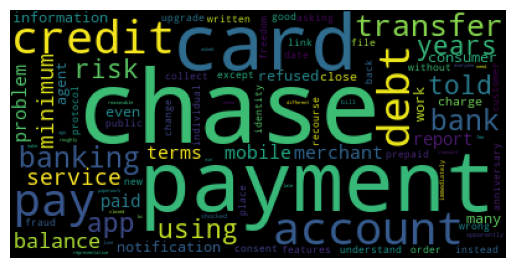

In [22]:
#add masked words to stopwords
#removing stopwords
#re-visualizing

new_stopwords = ['xxxx', 'xx xx', 'xx']
stop.extend(new_stopwords)
topic_d['combined data'] = topic_d['combined data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

text = topic_d['combined data'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## NMF

In [23]:
#initialising the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.95)

In [24]:
#Document Term matrix

doc_term_matrix = tfidf.fit_transform(topic_d['combined data'])

In [25]:
#Choosing best number of topics as n_component

nmf_model = NMF(n_components=5,random_state=42)

In [26]:
W = nmf_model.fit_transform(doc_term_matrix)
len(tfidf.get_feature_names())

C:\Users\erisha_ferrao\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\erisha_ferrao\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


15079

In [27]:
#Top 25 words for each topic

for index,topic in enumerate(nmf_model.components_):
    print(f'top 20 words for topic {index+1}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

top 20 words for topic 1
['settlement', 'existing', 'applying', 'refinancing', 'attempts', 'owed', 'chase', 'collect', 'student', 'consumer', 'payment', 'trouble', 'process', 'application', 'broker', 'originator', 'lease', 'pay', 'struggling', 'debt', 'loan', 'mortgage', 'collection', 'foreclosure', 'modification']


top 20 words for topic 2
['deposit', 'accounts', 'money', 'called', 'consumer', 'loan', 'cancelling', 'told', 'closed', 'check', 'lease', 'caused', 'low', 'chase', 'funds', 'opening', 'company', 'lender', 'problem', 'charging', 'closing', 'managing', 'checking', 'savings', 'account']


top 20 words for topic 3
['features', 'closing', 'rate', 'apr', 'fees', 'information', 'incorrect', 'consumer', 'personal', 'getting', 'repair', 'services', 'reports', 'chase', 'report', 'disputes', 'reporting', 'billing', 'purchase', 'shown', 'statement', 'problem', 'prepaid', 'credit', 'card']


top 20 words for topic 4
['costs', 'settlement', 'applying', 'student', 'refinancing', 'money',

In [28]:
#getting best topic 
topics = nmf_model.transform(doc_term_matrix)
topics

array([[0.01197499, 0.        , 0.00167427, 0.        , 0.00016532],
       [0.00448404, 0.00082236, 0.00620878, 0.        , 0.01126261],
       [0.        , 0.00213561, 0.02170865, 0.00072389, 0.00197219],
       ...,
       [0.00010646, 0.00414308, 0.00471586, 0.00030232, 0.00983793],
       [0.        , 0.        , 0.0255811 , 0.00382555, 0.00160647],
       [0.0015448 , 0.        , 0.00923773, 0.00318388, 0.01155043]])

In [29]:
complaint_topic=topics.argmax(axis=1)

In [30]:
#adding it to the dataframe
topic_d['Topic'] = complaint_topic
topic_d

,combined data,Topic
0,attempts collect debt owed debt collection,0
1,written notification debt debt collection good...,4
2,features terms problems credit card prepaid ca...,2
3,trouble payment process mortgage,3
4,fees interest credit card prepaid card,2
...,...,...
78308,closing account checking savings account,1
78309,features terms problems credit card prepaid ca...,2
78310,problem lender company charging account checki...,4
78311,features terms problems credit card prepaid ca...,2


## Creating a supervised model 

In [31]:
training_data=topic_d.copy()
training_data

,combined data,Topic
0,attempts collect debt owed debt collection,0
1,written notification debt debt collection good...,4
2,features terms problems credit card prepaid ca...,2
3,trouble payment process mortgage,3
4,fees interest credit card prepaid card,2
...,...,...
78308,closing account checking savings account,1
78309,features terms problems credit card prepaid ca...,2
78310,problem lender company charging account checki...,4
78311,features terms problems credit card prepaid ca...,2


In [32]:
X_train, X_test, y_train, y_test = train_test_split(training_data['combined data'], training_data.Topic, test_size=0.20, random_state=42)


In [33]:
#Get the Vector count
# We will be doing fit_transform  on train dataset and  transform on the  test data set 
count_vect = CountVectorizer()
X_train_t = count_vect.fit_transform(X_train)
X_test_t = count_vect.transform(X_test)

#Transform the word vector to tf-idf
# We will be doing fit_transform  on train dataset and  transform on the  test data set 
tfidf_transformer = TfidfTransformer()
X_train_t = tfidf_transformer.fit_transform(X_train_t)
X_test_t = tfidf_transformer.transform(X_test_t)

## using Decision Tree to classify

In [34]:
decision_t = DecisionTreeClassifier(max_depth=8, random_state=40)

In [35]:
decision_t.fit(X_train_t, y_train)
y_train_pred = decision_t.predict(X_train_t)

y_test_pred = decision_t.predict(X_test_t)

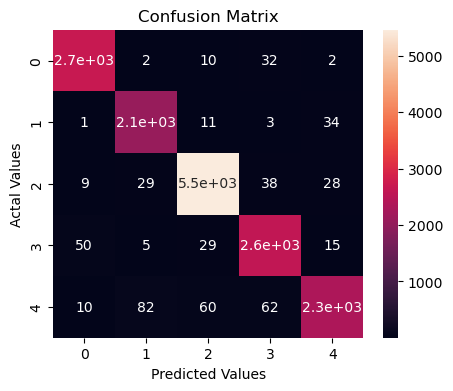

In [36]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test,y_test_pred)

cm_df = pd.DataFrame(cm,index = ['0','1','2','3','4'], 
                     columns = ['0','1','2','3','4'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [37]:
accuracy_score(y_test,y_test_pred)

0.9673114984358041

the model shows good accuracy

In [39]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2735
           1       0.95      0.98      0.96      2108
           2       0.98      0.98      0.98      5569
           3       0.95      0.96      0.96      2689
           4       0.97      0.92      0.94      2562

    accuracy                           0.97     15663
   macro avg       0.96      0.96      0.96     15663
weighted avg       0.97      0.97      0.97     15663

